In [ ]:
from google.colab import drive

# u/ dataframe
import pandas as pd
import re


# u/ split data
from sklearn.model_selection import train_test_split

# u/ preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# u/ visualisasi plot
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

In [ ]:
training_data = pd.read_csv("/content/drive/My Drive/dataset/train.csv")
testing_data = pd.read_csv("/content/drive/My Drive/dataset/test.csv")

In [ ]:
training_data.sample(2)

,id,keyword,location,text,target
6500,9293,survive,"Semarang, Indonesia",Parental experience may help coral offspring s...,0
1046,1513,body%20bags,Bushkill pa,#IranDeal most members of Congress who don't w...,0


In [ ]:
training_data['text'].isnull().sum()

0

Ubah seluruh teks menjadi huruf kecil

In [ ]:
training_data['new_text'] = training_data['text'].apply(lambda x:x.lower())

**Lemmatisasi**
Lemmatisasi adalah proses di mana konteks digunakan untuk mengubah kata menjadi bentuk dasar atau akar yang bermakna. Sekarang, mari kita coba sederhanakan definisi formal di atas untuk mendapatkan intuisi Lemmatisasi yang lebih baik.

Sebagai contoh:

mencintai dilemmatisasi sebagai cinta yang dicintai => cinta

In [ ]:
lemm=WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('all')

In [ ]:
training_data['new_text'] = training_data['new_text'].apply(lambda x:lemm.lemmatize(x))

**StopWords**
Stopwords adalah kata-kata yang sering digunakan dengan makna yang sangat sedikit. Stopwords adalah kata-kata yang sangat umum sehingga pada dasarnya diabaikan oleh tokenizer biasa. Secara default, NLTK (Natural Language Toolkit) menyertakan daftar 40 stop words, termasuk: "a", "an", "the", "of", "in", dan seterusnya..

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

In [ ]:
training_data['new_text'] = training_data['new_text'].apply(remove_stopwords)

Hapus teks yang tidak diinginkan-  Teks cleaning

In [ ]:
def clean_text(text):
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    text = re.sub(r'#', '', text)
    return text

In [ ]:
training_data['new_text'] = training_data['new_text'].apply(clean_text)

Menghapus semua tanda baca dari string, jika ada

In [ ]:
def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

Tentukan Fitur dan Target untuk melatih model

In [ ]:
training_data['new_text'] = training_data['new_text'].apply(remove_punctuation_func)

In [ ]:
training_data.sample(5)

,id,keyword,location,text,target,new_text
5632,8032,refugees,NaN,A Turkish couple spent their wedding day feedi...,0,turkish couple spent wedding day feeding 4000 ...
1968,2832,cyclone,Beside Basketball,Talent: Misdirection Cyclone Pass Ignite Pass ...,1,talent misdirection cyclone pass ignite pass ...
5792,8264,rioting,Upstate New York,I think Twitter was invented to keep us insomn...,0,think twitter invented keep us insomniacs riot...
5799,8278,rioting,NaN,@aelinrhee a group of mascara smeared girls ri...,1,aelinrhee group mascara smeared girls rioting...
3193,4584,emergency%20plan,Indiana,Do you have a plan? Emergency Preparedness for...,0,plan emergency preparedness families of child...


In [ ]:
X = training_data['new_text']

In [ ]:
y = training_data['target']

In [ ]:
np.unique(y)

array([0, 1])

Text Preparation to train Deep Learning Model

teks merupakan data mentah atau tidak terstruktur. Untuk melatih Neural Network, kita perlu mengubah teks menjadi vektor, sehingga kita melakukan Tokenisasi data teks menjadi indeks kata yang unik.


In [ ]:
token = Tokenizer(num_words=10000,oov_token="<OOV>") 
#<OOV> singkatan dari out of vocabulary

In [ ]:
token.fit_on_texts(X) #only once- that is on training

In [ ]:
word_index = token.word_index

In [ ]:
training_seq = token.texts_to_sequences(X)

In [ ]:
train_padded = pad_sequences(training_seq,padding="post",truncating="post",maxlen=50)

Split the Data into Training and Validation

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(train_padded,y,test_size=0.2,train_size=0.8)

Build a LSTM Network

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(10000,128))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64,return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
model.compile("rmsprop", "binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
191/191 [==============================] - 37s 145ms/step - loss: 0.5273 - accuracy: 0.7315 - val_loss: 0.4544 - val_accuracy: 0.7925
Epoch 2/5
191/191 [==============================] - 26s 135ms/step - loss: 0.3569 - accuracy: 0.8530 - val_loss: 0.4791 - val_accuracy: 0.8102
Epoch 3/5
191/191 [==============================] - 26s 136ms/step - loss: 0.2925 - accuracy: 0.8874 - val_loss: 0.5249 - val_accuracy: 0.7846
Epoch 4/5
191/191 [==============================] - 26s 136ms/step - loss: 0.2414 - accuracy: 0.9113 - val_loss: 0.5748 - val_accuracy: 0.7978
Epoch 5/5
191/191 [==============================] - 28s 144ms/step - loss: 0.2010 - accuracy: 0.9268 - val_loss: 0.6124 - val_accuracy: 0.7781


Visualize Loss and Accuracy Tradeoff

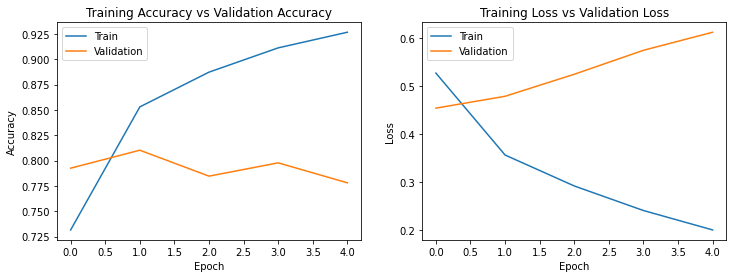

In [ ]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

Predict on Testing Data

In [ ]:
testing_seq = token.texts_to_sequences(testing_data['text'])

In [ ]:
test_padded = pad_sequences(testing_seq,padding="post",truncating="post",maxlen=50)

In [ ]:
pred = model.predict(test_padded)

102/102 [==============================] - 6s 38ms/step


In [ ]:
len(pred)

3263

In [ ]:
test_prediction = []
for i in pred:
    if i[0]>0.5:
        test_prediction.append(1)
    else:
        test_prediction.append(0)

In [ ]:
testing_data['target'] = test_prediction

In [ ]:
testing_data.sample(5)

,id,keyword,location,text,target
925,3041,death,"Manchester,England",#Spirituality - Born Again-Spiritual Awakening...,1
576,1872,burning,"Pasadena, CA",PSA- I chopped 3 #jalapenos &amp; my fingers w...,0
1402,4626,emergency%20services,NaN,When you say call dad but your phone dials eme...,0
3001,9917,trouble,SeattIe,a room full of adults going ÛÏboonew boonewÛ...,0
2672,8915,snowstorm,Los Angeles,@BigBang_CBS ...wow...ok...um...that was like ...,1
